In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [5]:
data = pd.read_csv("C:\\Users\\Harry\\OneDrive\\Documents\\dataset to work on.csv")

In [6]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.693277,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.524527,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
data.shape

(891, 12)

In [12]:
data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             71
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [30]:
data['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [31]:
data['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [14]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

SINCE MOST OF THE VALUES IN CABIN ARE NULL, IT IS BTTER TO DROP THE ENTIRE COLUMNB

In [15]:
clean1= data.drop('Cabin',axis=1)

In [16]:
clean1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


NOW WE DROP THE ROWS THAT CONTAIN NULL VALUES IN ANY COLUMN 

In [17]:
clean2 = clean1.dropna(subset=['Age','Embarked'])


In [19]:
clean2.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [57]:
clean2.shape

(712, 11)

NOW COMES THE PART OF DETECTING AND REMOVING OUTLIERS

C:\Users\Harry\AppData\Local\Temp\ipykernel_2560\2726452858.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(clean2['Age'])
C:\Users\Harry\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Density'>

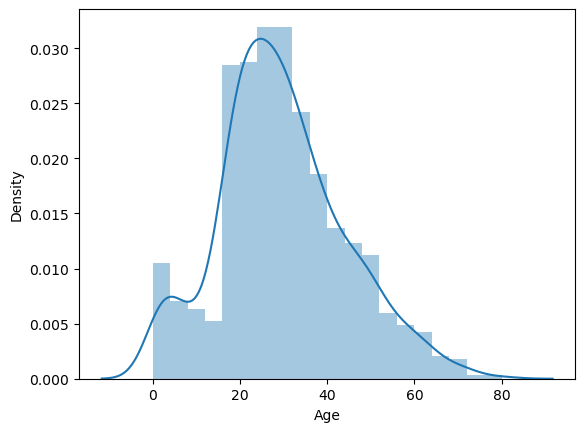

In [28]:
sns.distplot(clean2['Age'])

AS WE CAN SEE CLEARLY, AGE IS HIGHLY SKEWED ON LEFT 

<Axes: >

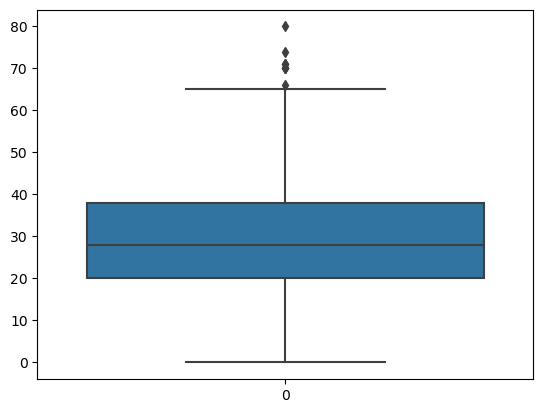

In [49]:
sns.boxplot(clean2['Age'])

NOW WE CAN CLEARLY SEE THAT WE HAVE OUTLIERS IN AGE COLUMN 

SO FIRST STEP IS TO DETECT THE OUTLIER VALUE 

WE CAN USE EITHER Z-SCORE OR IQR TO DETERMINE THE OUTLIERS IN OUT DATA. HERE I AM USING IQR TO DECTECT OUTLIERS. 

In [62]:

Q1 = clean2['Age'].quantile(0.25)
Q3 = clean2['Age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


clean3 = clean2[(clean2['Age'] >= lower_bound) & (clean2['Age'] <= upper_bound)]


<Axes: >

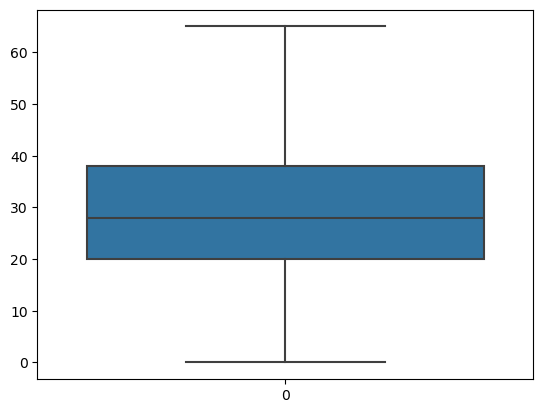

In [64]:
sns.boxplot(clean3['Age'])

In [66]:
clean3.shape

(704, 11)

In [67]:
clean3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 704 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  704 non-null    int64  
 1   Survived     704 non-null    int64  
 2   Pclass       704 non-null    int64  
 3   Name         704 non-null    object 
 4   Sex          704 non-null    object 
 5   Age          704 non-null    float64
 6   SibSp        704 non-null    int64  
 7   Parch        704 non-null    int64  
 8   Ticket       704 non-null    object 
 9   Fare         704 non-null    float64
 10  Embarked     704 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 82.2+ KB


In [68]:
clean3.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.00000
mean,448.511364,0.407670,2.245739,29.160511,0.518466,0.436080,34.64517
std,258.113403,0.491751,0.835288,13.857888,0.934376,0.857669,53.18326
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000
25%,224.500000,0.000000,1.000000,20.000000,0.000000,0.000000,8.05000
50%,443.500000,0.000000,3.000000,28.000000,0.000000,0.000000,15.64585
75%,677.250000,1.000000,3.000000,38.000000,1.000000,1.000000,32.62500
max,891.000000,1.000000,3.000000,65.000000,5.000000,6.000000,512.32920


NOW LETS CHECK AND REMOVE THE REDUNDANCIES 

In [73]:
duplicates = clean3.duplicated()
num_duplicates = duplicates.sum()
print(f'number of duplicate rows: {num_duplicates}')
clean4 = clean3.drop_duplicates()

number of duplicate rows: 0


In [76]:
duplicated_passengerid = clean4['PassengerId'].duplicated()
num_duplicated_passengerid = duplicated_passengerid.sum()
print(f'number of duplicate passengr ids are {num_duplicated_passengerid}')

number of duplicate passengr ids are 0


SINCE THERE ARE NO DUPLICATE VALUES THAT CAN HARM THE MODEL, WE CAN MOVE FURTHER

NOW AFTER THE REMOVAL OF OUTLIERS AND NULL VALUE WE CAN SAY THAT THE DATA IS NOW READY TO BE DIAGNOSED FURTHER

NOW COMES THE RELATIONSHIP ANALYSIS BETWEEN THE VARIBALES 

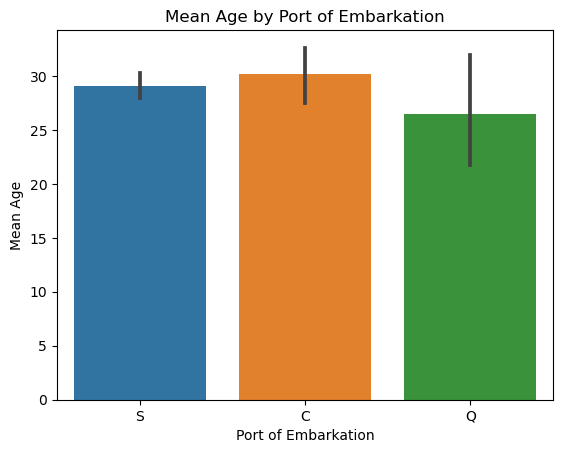

In [126]:
clean4['Age'] = clean4['Age'].astype(float)
sns.barplot(x='Embarked', y='Age', data=clean4, estimator=np.mean)
plt.title('Mean Age by Port of Embarkation')
plt.xlabel('Port of Embarkation')
plt.ylabel('Mean Age')
plt.show()

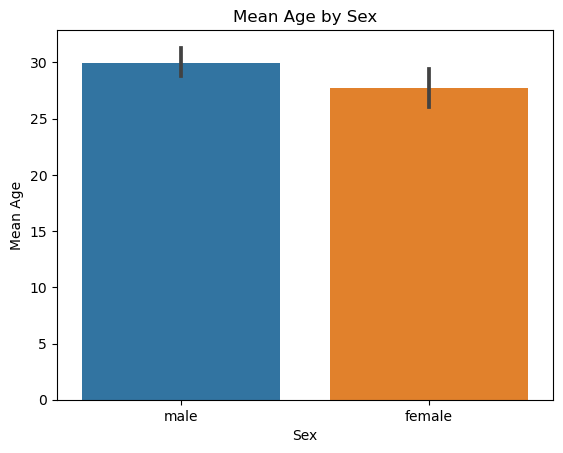

In [128]:
clean4['Age'] = clean4['Age'].astype(float)
sns.barplot(x='Sex', y='Age', data=clean4, estimator=np.mean)
plt.title('Mean Age by Sex')
plt.xlabel('Sex')
plt.ylabel('Mean Age')
plt.show()

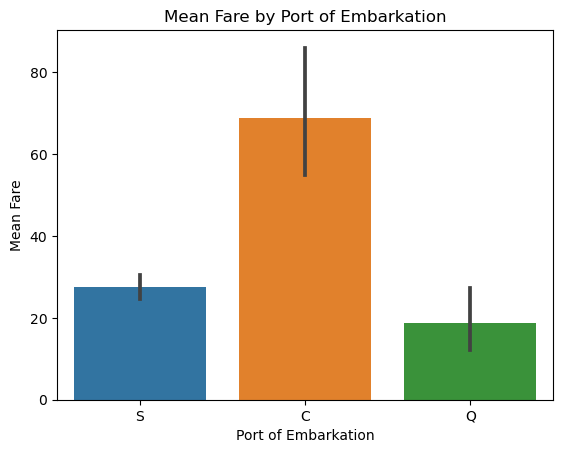

In [80]:
sns.barplot(x='Embarked', y='Fare', data=clean4, estimator=np.mean)
plt.title('Mean Fare by Port of Embarkation')
plt.xlabel('Port of Embarkation')
plt.ylabel('Mean Fare')
plt.show()

In [119]:
correlation_by_sex = clean4.groupby('Sex')[['Age', 'Fare']].corr().unstack()['Age']['Fare']
print(f'THESE VALES ARE CORRELATION BY SEX{correlation_by_sex}')

THESE VALES ARE CORRELATION BY SEXSex
female    0.167513
male      0.083138
Name: Fare, dtype: float64


In [120]:
df = pd.DataFrame(clean4)
pearson_corr = df[['Age', 'Survived']].corr()
print(f'Thi values show the survival correlation with age {pearson_corr}')


Thi values show the survival correlation with age                Age  Survived
Age       1.000000 -0.068689
Survived -0.068689  1.000000


THIS INDICATED THERE IS A NON LINEAR RELATIONSHIP BETWEEN AGE AND SURVIVED 

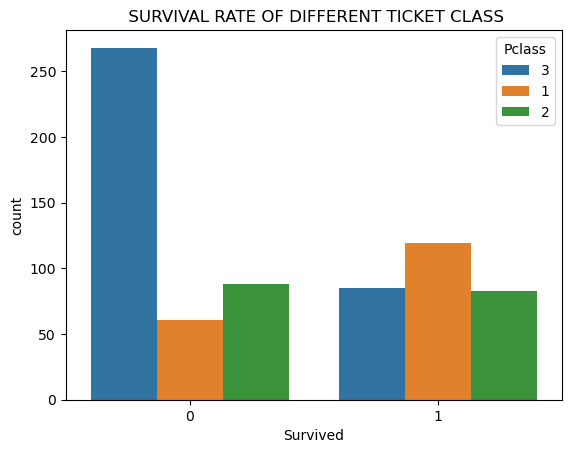

In [115]:
clean4['Pclass'] = clean4['Pclass'].astype(str)
sns.countplot(x='Survived',hue='Pclass', data=clean4)
plt.title(' SURVIVAL RATE OF DIFFERENT TICKET CLASS')
plt.show()

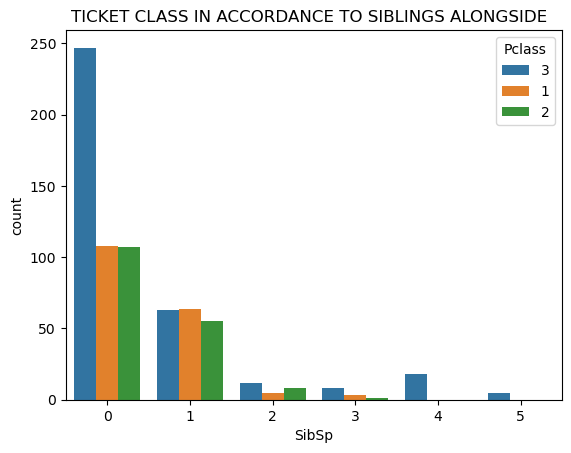

In [116]:
clean4['Pclass'] = clean4['Pclass'].astype(str)
sns.countplot(x='SibSp',hue='Pclass', data=clean4)
plt.title('TICKET CLASS IN ACCORDANCE TO SIBLINGS ALONGSIDE  ')
plt.show()

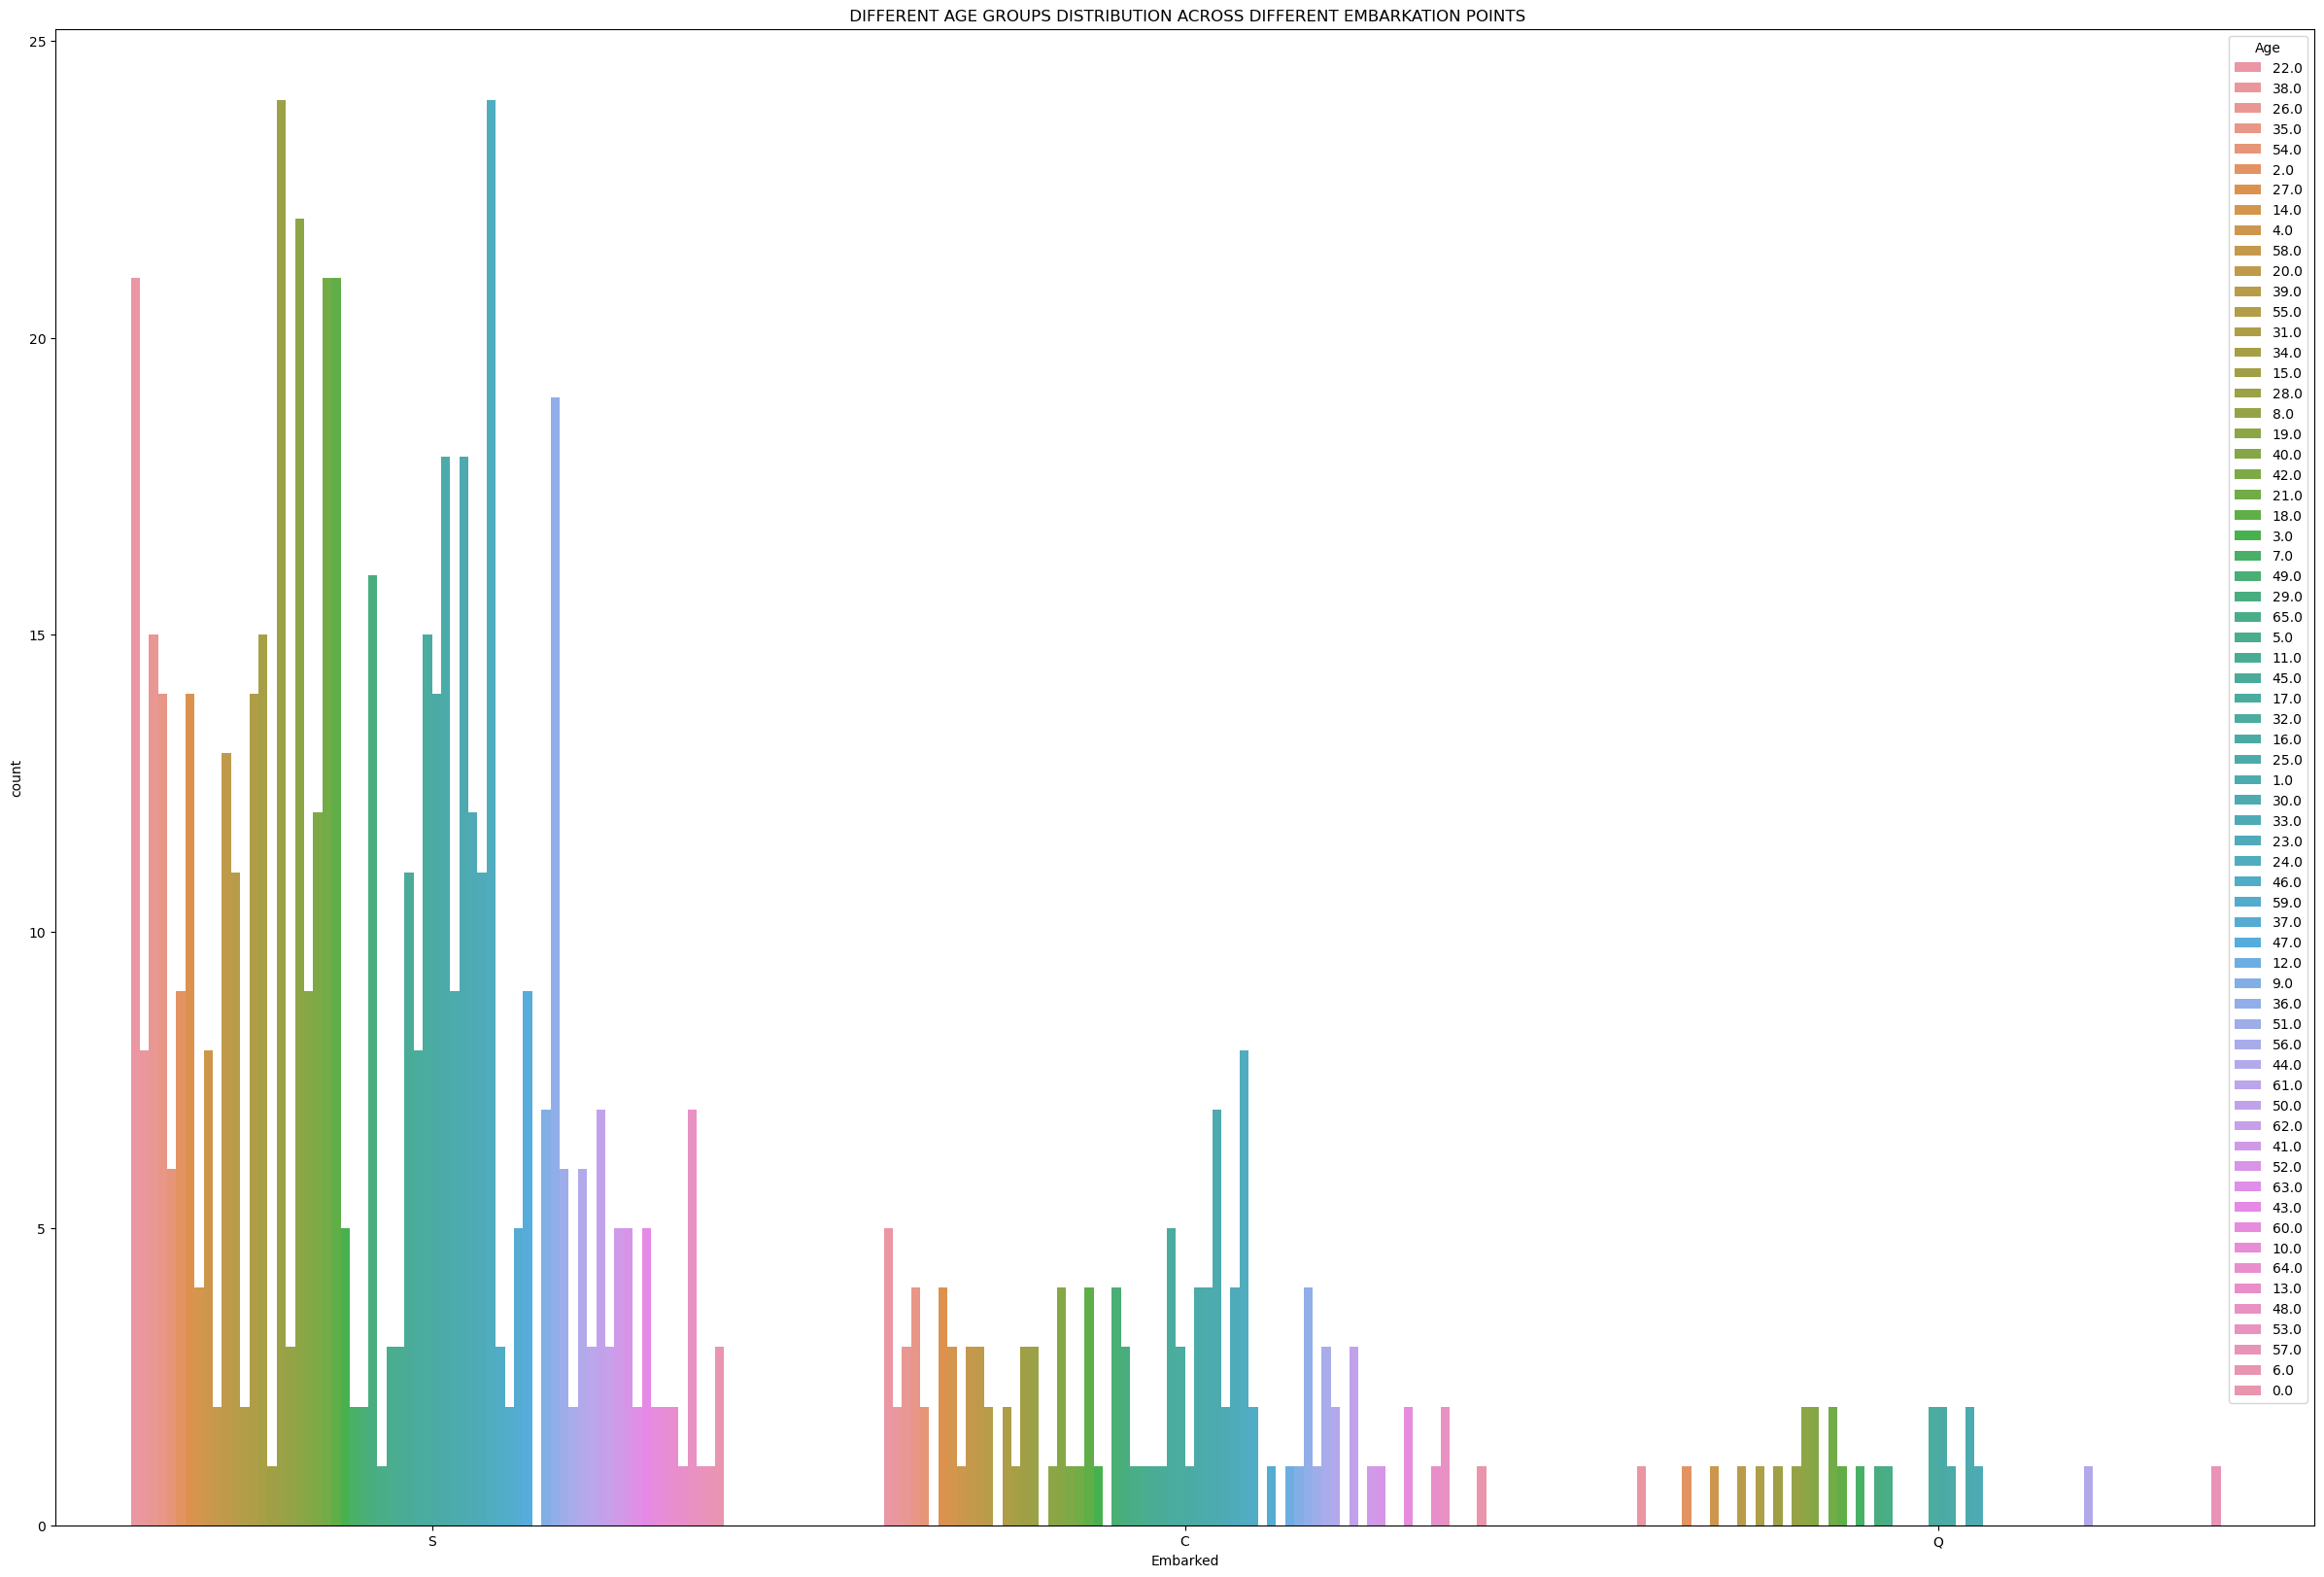

In [117]:
clean4['Age'] = clean4['Age'].astype(str)
plt.figure(figsize=(30,20))
sns.countplot(x='Embarked',hue='Age', data=clean4)
plt.title(' DIFFERENT AGE GROUPS DISTRIBUTION ACROSS DIFFERENT EMBARKATION POINTS')
plt.show()

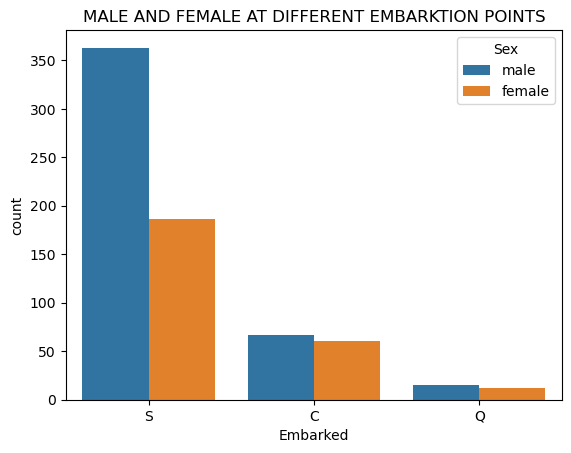

In [118]:
sns.countplot(x='Embarked',hue='Sex', data=clean4)
plt.title('MALE AND FEMALE AT DIFFERENT EMBARKTION POINTS')
plt.show()